In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


filename="bls_cve/bls_{}.csv"
file_list=[]
for i in ("2014","2015","2016","2017"):
    
    file_list.append(pd.read_csv(filename.format(i),low_memory=False, thousands=',')) 
#file_2014=pd.read_csv("bls_cve/bls_2014.csv", sep=",",thousands=",")

file_combined=pd.concat(file_list)


In [30]:
for item in ("A_MEAN","A_PCT10","A_PCT25","A_PCT10","A_MEDIAN","A_PCT75","A_PCT90"):
    file_combined[item]=file_combined[item].astype(str)
    file_combined[item] = file_combined[item].str.replace(',', '')
    file_combined[item] = pd.to_numeric(file_combined[item], errors='coerce')
group_year=file_combined.groupby(["YEAR"])
group_year_mean=group_year["A_MEAN"].mean()
group_year_median=group_year["A_MEDIAN"].mean()

In [31]:
group_year_mean_df=pd.DataFrame(group_year_mean).reset_index()
group_year_median_df=pd.DataFrame(group_year_median).reset_index()


In [32]:
year_2014_mean=file_combined.loc[file_combined["YEAR"]==2014,["A_MEAN","OCC_TITLE"]]
year_2015_mean=file_combined.loc[file_combined["YEAR"]==2015,["A_MEAN","OCC_TITLE"]]
year_2016_mean=file_combined.loc[file_combined["YEAR"]==2016,["A_MEAN","OCC_TITLE"]]
year_2017_mean=file_combined.loc[file_combined["YEAR"]==2017,["A_MEAN","OCC_TITLE"]]
year_2014_median=file_combined.loc[file_combined["YEAR"]==2014,["A_MEDIAN","OCC_TITLE"]]
year_2015_median=file_combined.loc[file_combined["YEAR"]==2015,["A_MEDIAN","OCC_TITLE"]]
year_2016_median=file_combined.loc[file_combined["YEAR"]==2016,["A_MEDIAN","OCC_TITLE"]]
year_2017_median=file_combined.loc[file_combined["YEAR"]==2017,["A_MEDIAN","OCC_TITLE"]]

In [33]:
group_title_year=file_combined.groupby(["OCC_TITLE","YEAR"])
group_title_year_mean=group_title_year["A_MEAN"].mean()
group_title_year_mean_df=pd.DataFrame(group_title_year_mean.reset_index())


In [34]:
group_title_year=file_combined.groupby(["OCC_TITLE","YEAR"])
group_title_year_median=group_title_year["A_MEDIAN"].mean()
group_title_year_median_df=pd.DataFrame(group_title_year_median.reset_index())


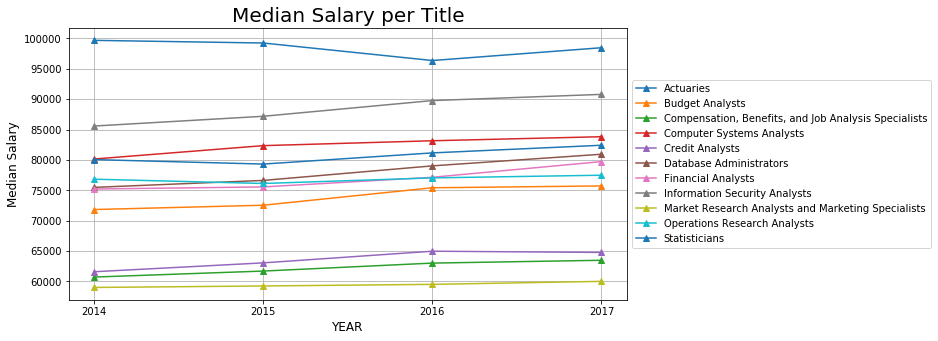

In [109]:
title=[]
year=[]
median=[]
x_axis=np.arange(4)
tick_location=[value for value in x_axis]
plt.figure(figsize=(10,5))
for i in range(1,len(group_title_year_median_df)+1):
    title.append(group_title_year_median_df.iloc[i-1,0])
    year.append(group_title_year_median_df.iloc[i-1,1])
    median.append(group_title_year_median_df.iloc[i-1,2])
    
    if i % 4 ==0:
        title_array=np.array(title)
        year_array=np.array(year)
        median_array=np.array(median)
        plt.plot(year_array, median_array, marker="^",label=title[0])
        plt.locator_params(axis='x', nbins=4)
        plt.grid()
        i += 1
        title=[]
        year=[]
        median=[]
    else:
        i+=1
plt.title("Median Salary per Title",fontsize=20)
plt.xlabel("YEAR",fontsize=12)
plt.ylabel("Median Salary",fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

    

In [73]:

#sorted(group_title_year_median_df,key="A_MEDIAN")
group_title_year_median_df

,OCC_TITLE,YEAR,A_MEDIAN
0,Actuaries,2014.0,99686.666667
1,Actuaries,2015.0,99249.285714
2,Actuaries,2016.0,96366.923077
3,Actuaries,2017.0,98472.727273
4,Budget Analysts,2014.0,71835.955056
5,Budget Analysts,2015.0,72545.232558
6,Budget Analysts,2016.0,75419.545455
7,Budget Analysts,2017.0,75722.345679
8,"Compensation, Benefits, and Job Analysis Speci...",2014.0,60719.939024
9,"Compensation, Benefits, and Job Analysis Speci...",2015.0,61707.515924


In [61]:
group_year_mean_df["A_MEAN"].astype(float).map("${:,.2f}".format)
group_year_mean_df

,YEAR,A_MEAN
0,2014.0,75117.814871
1,2015.0,76346.462949
2,2016.0,78004.045455
3,2017.0,79252.712007


In [62]:
group_year_median_df

,YEAR,A_MEDIAN
0,2014.0,71226.176024
1,2015.0,72134.721161
2,2016.0,73535.628788
3,2017.0,74737.455919


In [74]:
def label_bar(ax, bars, text_format, **kwargs):
    """
    Attach a text label to each bar displaying its y value
    """
    for bar in bars:
        text = text_format.format(bar.get_height())
        text_x = bar.get_x() + bar.get_width() / 2
        text_y = bar.get_height()
        
        ax.text(text_x, text_y, text, ha='center', va='bottom', color="black",**kwargs)

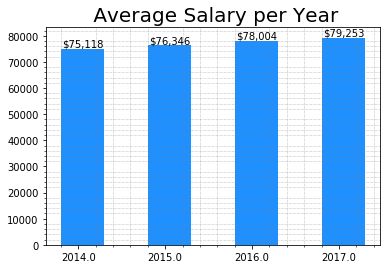

In [98]:
fig,ax=plt.subplots()
x_axis=np.arange(len(group_year_mean_df))
tick_location=[value+0.2 for value in x_axis]
# plt.figure(figsize=(5,10))
bar_graph=plt.bar(x_axis,group_year_mean_df["A_MEAN"], width=0.5, align="edge",color="dodgerblue")
plt.xticks(tick_location,group_year_mean_df["YEAR"])
plt.locator_params(axis='x', nbins=8)
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.title(" Average Salary per Year",fontsize=20)

value_format = "${:,.0f}"
label_bar(ax, bar_graph, value_format)
plt.show()

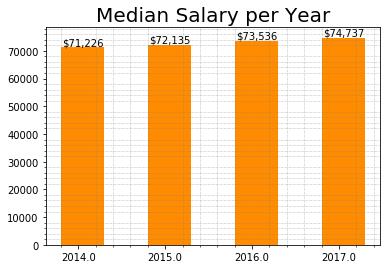

In [99]:
fig,ax=plt.subplots()
x_axis=np.arange(len(group_year_median_df))
bar_graph2=plt.bar(x_axis,group_year_median_df["A_MEDIAN"], width=0.5, align="edge",color="darkorange")
plt.xticks(tick_location,group_year_median_df["YEAR"])
plt.locator_params(axis='x', nbins=8)
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.title("Median Salary per Year",fontsize=20)

value_format = "${:,.0f}"
label_bar(ax, bar_graph2, value_format)
plt.show()

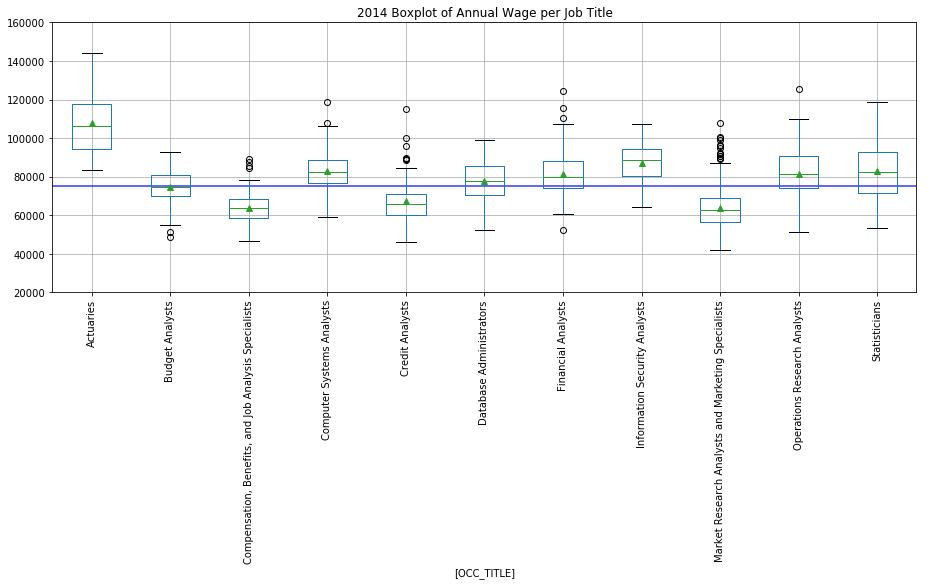

In [122]:
title_mean_2014=year_2014_mean.loc[:,["A_MEAN","OCC_TITLE"]]
boxplot2=title_mean_2014.boxplot(by=["OCC_TITLE"], grid=True, rot=90, figsize=(15,5), showmeans=True)
plt.hlines(group_year_mean_df.iloc[0,1], 0, 12, alpha=0.8,color='blue')
plt.ylim(20000,160000)
plt.title("2014 Boxplot of Annual Wage per Job Title")
plt.suptitle("")
plt.show()


In [105]:
group_year_median_df

,YEAR,A_MEDIAN
0,2014.0,71226.176024
1,2015.0,72134.721161
2,2016.0,73535.628788
3,2017.0,74737.455919


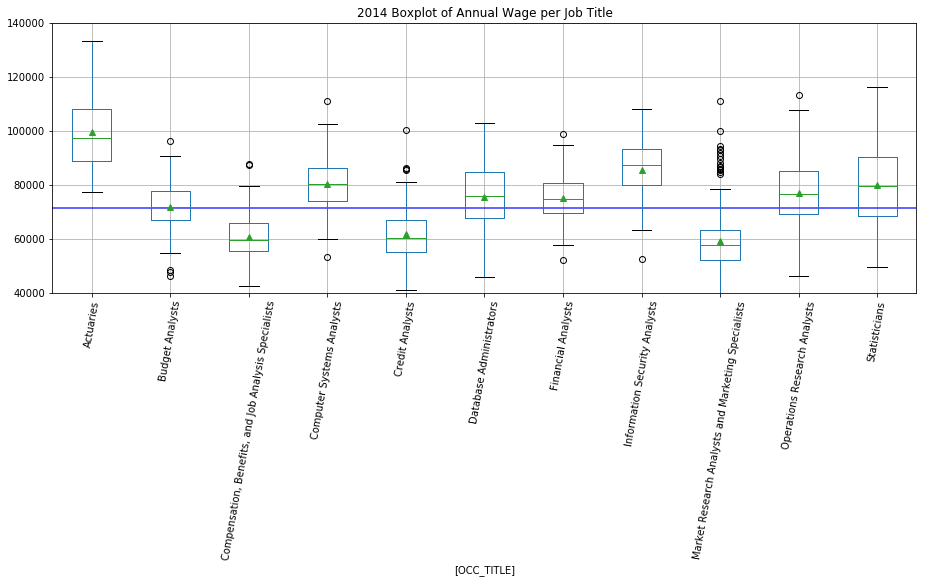

In [123]:
title_median_2014=year_2014_median.loc[:,["A_MEDIAN","OCC_TITLE"]]
boxplot2=title_median_2014.boxplot(by=["OCC_TITLE"], grid=True, rot=80, figsize=(15,5), showmeans=True)
plt.hlines(group_year_median_df.iloc[0,1], 0, 12, alpha=0.8,color='blue')
plt.ylim(40000,140000,20000)
plt.title("2014 Boxplot of Annual Wage per Job Title",fontsize=20)
plt.suptitle("")
plt.show()


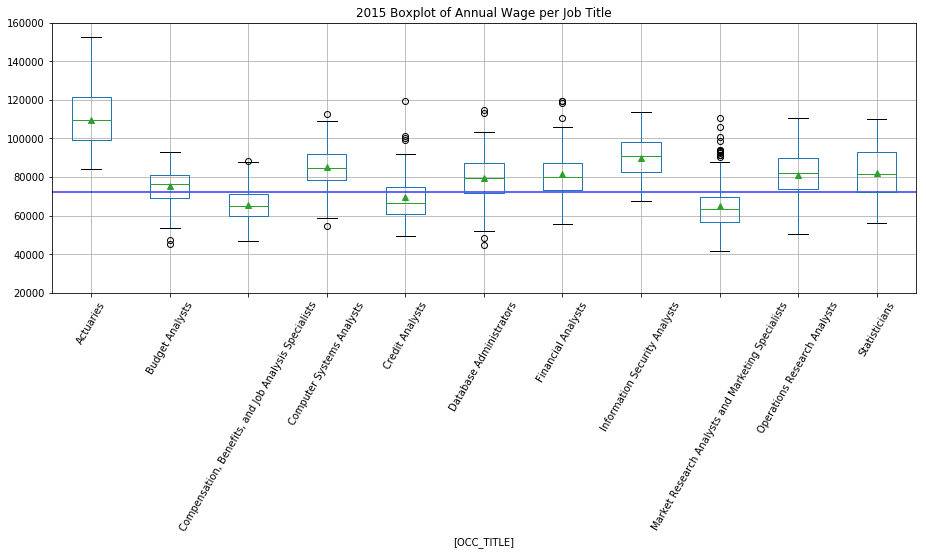

In [106]:
title_mean_2015=year_2015_mean.loc[:,["A_MEAN","OCC_TITLE"]]

boxplot2=title_mean_2015.boxplot(by=["OCC_TITLE"], grid=True, rot=60, figsize=(15,5), showmeans=True)
plt.hlines(group_year_median_df.iloc[1,1], 0, 12, alpha=0.8,color='blue')
plt.ylim(20000,160000)
plt.title("2015 Boxplot of Annual Wage per Job Title")
plt.suptitle("")
plt.show()

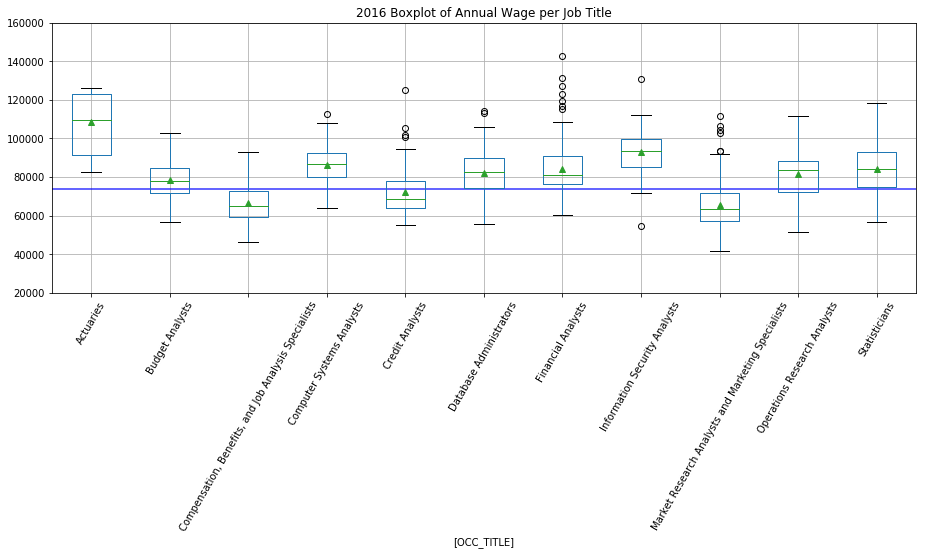

In [107]:
title_mean_2016=year_2016_mean.loc[:,["A_MEAN","OCC_TITLE"]]

boxplot2=title_mean_2016.boxplot(by=["OCC_TITLE"], grid=True, rot=60, figsize=(15,5), showmeans=True)
plt.hlines(group_year_median_df.iloc[2,1], 0, 12, alpha=0.8,color='blue')
plt.ylim(20000,160000)
plt.title("2016 Boxplot of Annual Wage per Job Title")
plt.suptitle("")
plt.show()

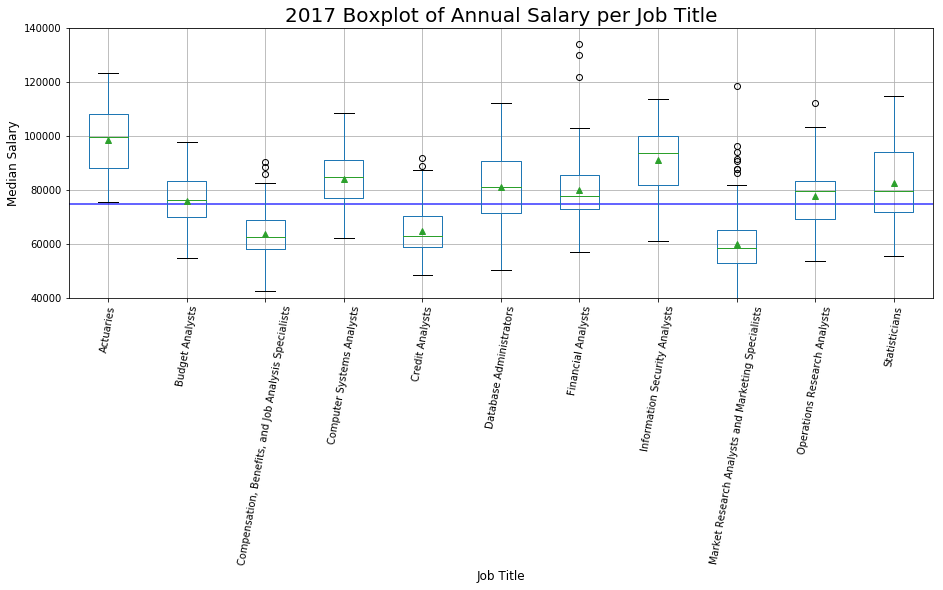

In [116]:
title_median_2017=year_2017_median.loc[:,["A_MEDIAN","OCC_TITLE"]]
boxplot2=title_median_2017.boxplot(by=["OCC_TITLE"], grid=True, rot=80, figsize=(15,5), showmeans=True)
plt.hlines(group_year_median_df.iloc[3,1], 0, 12, alpha=0.8,color='blue')
plt.ylim(40000,140000,20000)
plt.title("2017 Boxplot of Annual Salary per Job Title",fontsize=20)
plt.xlabel("Job Title",fontsize=12)
plt.ylabel("Median Salary",fontsize=12)
plt.suptitle("")
plt.show()

In [ ]:
for i in ("2014","2015","2016","2017"):
    plt.plot(ddf.index, ddf[f'{i}'])